# Table of Content <a id='toc'></a>


&nbsp;&nbsp;&nbsp;&nbsp;[2. Maximum Likelihood](#0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[The link between OLS method and Maximum likelihood](#1.1)

&nbsp;&nbsp;&nbsp;&nbsp;[3. Generalized linear model](#1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Practical case 1 : Count of Galumna mites among moss samples](#3.1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Modeling process of the GLM](#3.3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Poisson model GLM on the mites data](#3.4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Practical case 2 : Relation between the presence of  kyphosis and and a few covariates](#3.2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Bernouilli model on the kyphosis data (logistic regression)](#3.5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[model testing with GLMs](#3.6)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Predicting kyphosis from our model](#3.7)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise on GLM :  a dose-response problem](#2)

[Annex : is the Pearson chi2 adapted for the mites data](#A0)

[Annex : Additionnal Practical case : exponential growth of Corona virus infection](#A1)

[Annex : is the Pearson chi2 adapted for the infection data](#A2)

[Annex : trying a negative binomial model on the infection data](#A3)

[Annex : compute the confidence interval in GLMs - example with a gaussian distribution](#confint)

In [88]:
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import warnings

In [26]:
%matplotlib inline
import matplotlib

In [27]:
# a couple more configuration of the plotting engine
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=18)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

Before  we can delve into the large topic of **Generalized Linear Models**, we are going to introduce the more general framework of **Maximum Likelihood** upon which rely most of the fitting problems of GLMs.



[back to the toc](#toc)

<br>

# 2. Maximum Likelihood <a id='0'></a>

Maximum Likelihood is a method that is used to estimate parameters of a probablililty distribution. It is done by **maximizing the likelihood function**. In the case that we are interested in (i.e. independant identically distributed) this likelihood function is simply the product of  a density function values over the entire sample. **It is a parametric method** since it needs to have an a priori about the density function for it to work. 

Since it is a product, most of the time we would rather work with the log likelihood function which transforms this product into a sum.

So we would like to maximize $l$, the loglikelihood function, by choosing a set of parameters $\pmb\Theta$.
Where $l$ is of the form:

$$l(\pmb\Theta;X)=\sum_i ln(p(x_i|\pmb\Theta))$$

Where $X$ is a random variable and $p()$ is the density function associated to $X$. So you want to find the following estimation for $\pmb\Theta$

$$\hat{\pmb\Theta}=argmax_{\pmb\Theta} l(\pmb\Theta;X)$$

> Note : this formulation of the likelihood relies on the Bayes theorem. It puts forward that the likelihood of parameters given the observed data depends on the probability of the observed data given the parameters. Thus, in ML we search the parameters for which the observed data seems the most probable.


Let's take the example of a gaussian where you would like to estimate the $\sigma$ and the $\mu$, given your data. As they are simulated data we chose that $\mu=2$ and $\sigma=0.5$

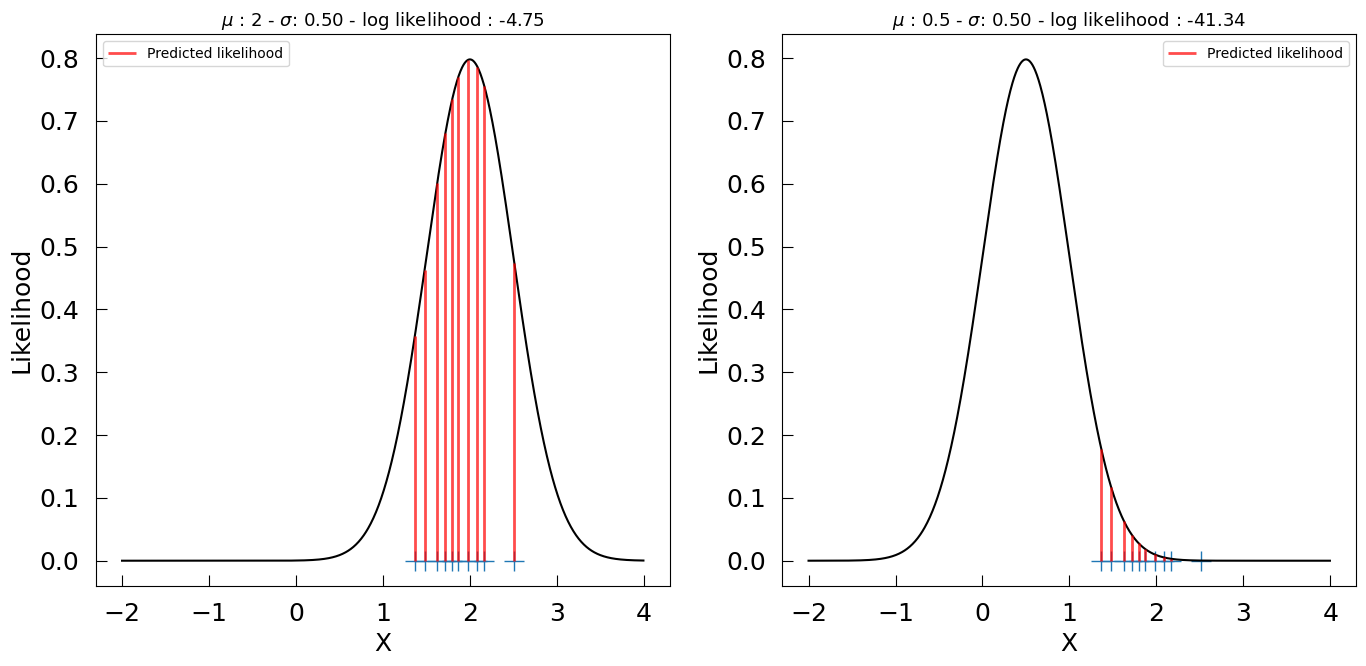

In [28]:
X_small=np.random.randn(10)*0.5+2 # this is our observed data, with ( mean=2 , sd=0.5 )

m=[2,0.5] # we will try 2 possible combinations of paramters ( mean=2 , sd=0.5 ) and ( mean=0.5 , sd=0.5 )
s=[0.5,0.5]


fig, ax = plt.subplots(ncols=len(m) , figsize = (14,7))

X_small_=[[v,0] for v in X_small] # this will be used to plot segments

x=np.arange(-2,4,0.005) # we will plot between -2 and 4

for q in range(len(m)): # for each of the parameter combinations we want to try
    ax[q].plot(X_small,[0]*len(X_small),marker='+', linewidth=0 , markersize = 15) # we plot the observed data as crosses

    # we plot the distribution we are testing
    ax[q].plot( x , stats.norm.pdf( x , loc = m[q] , scale = s[q] ),'k')

    Predicted = stats.norm.pdf( X_small , loc = m[q] , scale = s[q] )

    Predicted_= [i for i in zip(X_small,Predicted)] # this is to plot segments
    lc = mc.LineCollection(zip(X_small_,Predicted_) ,
                           colors='red',linewidths=2,alpha=0.7,
                           label='Predicted likelihood')
    ax[q].add_collection(lc)
    ax[q].legend(loc='best',fontsize=10)

    # the log likelihood of this set of parameters is the sum of the log of the probability
    # densities of the sample
    sum_like=sum(np.log(Predicted))
    ax[q].set_title('$\mu$ : {} - $\sigma$: {:.2f} - log likelihood : {:.2f}'.format(m[q],
                                                                                     s[q],
                                                                                     sum_like) ,
                    fontsize=13)

    ax[q].set_xlabel('X')
    ax[q].set_ylabel('Likelihood')

    ## setting the yscale to log can make sense here
    #ax[q].set_yscale('log')

plt.tight_layout()

Multiplying those red bars is exactly what the maximum likelihood does. 

Basically, you shift your theoritical distribution to the right or the left (trying different means), and you narrow it or widen it (trying different variances). 

For each of those try you multiply those red bars together, and the combination of parameters giving highest result is the one maximizing the likelihood of your data being produced by that distribution with those parameters.


It is important to point out here that **even when our data are actually coming from a certain distribution, there will (almost) always be a difference between the theoretical distribution and the recovered one**, as to have perfect match you would need an infinite number of data points.


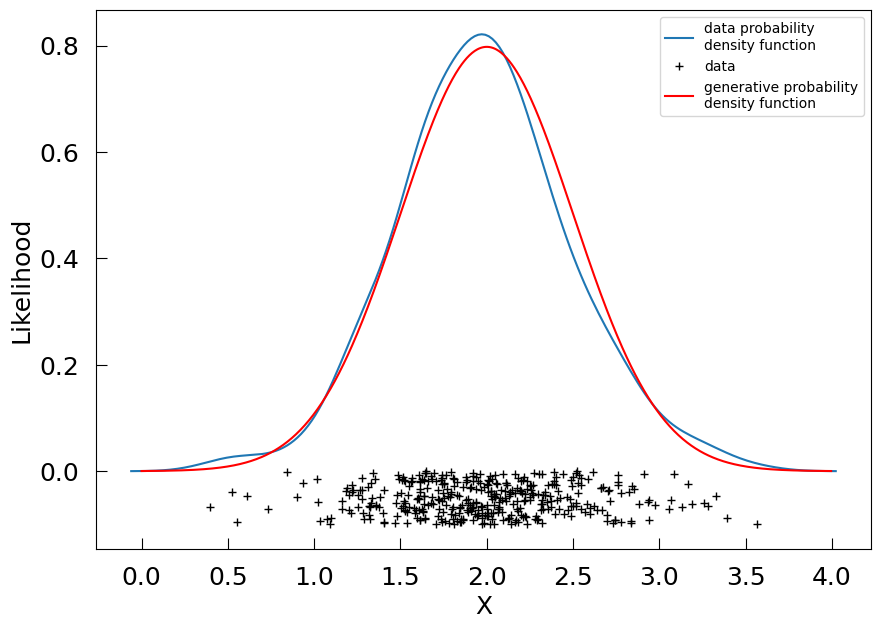

In [43]:
X=np.random.randn(400)*0.5+2
fig = plt.figure(figsize = (10,7))
sns.kdeplot(X,label='data probability\ndensity function')
x=np.arange(0,4,0.005)
plt.plot(X, np.random.rand(len(X))*-0.1 ,'k+',label='data')
plt.plot(x, stats.norm.pdf( x , loc = 2 , scale = 0.5 ) ,'r',label='generative probability\ndensity function')
plt.ylabel('Likelihood')
plt.xlabel('X')
plt.legend(loc='best',fontsize=10);

Let's test many combinations of possible means and standard deviations to see where our maximum of likelihood lies.

In [45]:
import plotly.graph_objects as go
import plotly.express as px

def loglike_func(X,mu,sigma):
    """returns a loglikelihood of mu and sigma given data X"""
    ll = sum( np.log(stats.norm.pdf(X,mu,sigma) ) )
    if np.isnan(ll) or ll < -10**4:
        ll = -10**4 # we verify that no numerical error gave us an NaN or very small log value
    return ll

mu=np.linspace(0,4,250) # from 0 to 4
sigma=np.linspace(0.1,2.1,250) # from 0.1 to 2.1

mu,sigma=np.meshgrid(mu,sigma) # this useful function combines all possibles values for mu and sigma

loglike_func_V = np.vectorize( lambda mu,sigma : loglike_func(X,mu,sigma))

# we compute the log-likelihood for all tested parameters values
zs= loglike_func_V(np.ravel( mu ), np.ravel( sigma ) )

loglike=zs.reshape(mu.shape)

bestMu = np.ravel(mu)[np.argmax(zs)]
bestSigma = np.ravel(sigma)[np.argmax(zs)]
bestLogLikelihood = np.max(zs)

# catch runtime warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # make a plot
    fig = go.Figure(data=[go.Surface(x=mu,y=sigma,z=loglike),
                        go.Scatter3d(x=[bestMu],y=[bestSigma],z=[bestLogLikelihood])])
    fig.show()

Nicely enought this maximum likelihood method allows us to recover the true parameters of the distribution.


Let us look at the curvature of the loglikelihood space as it is bearing useful information. For that we are going to look at how the log likelihood function behave in function of $\mu$ when $\sigma=0.5$. Same for the behaviour of the likelihood function according to $\sigma$ when $\mu=2$

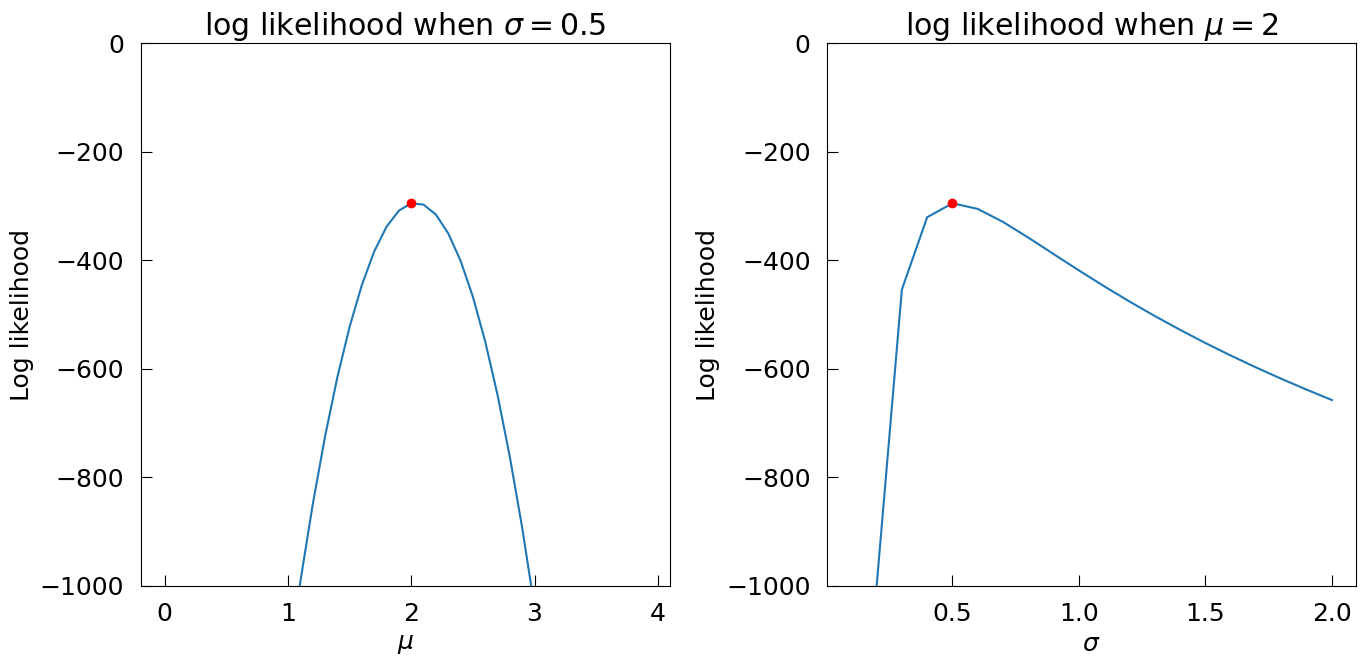

In [31]:
fig, ax = plt.subplots(ncols=len(m) , figsize = (14,7))
mu=np.arange(0,4,0.1)
sigma=np.arange(0.1,2.1,0.1)

for q in range(2):
    if q==0: # different values of mu for sigma=0.5
        ax[q].plot(mu,[loglike_func(X,mu=v,sigma=0.5) for v in mu])
        ax[q].plot([2],[loglike_func(X,mu=2,sigma=0.5)],'ro')
        ax[q].set_xlabel('$\mu$')
        ax[q].set_ylabel('Log likelihood')
        ax[q].set_title('log likelihood when $\sigma=0.5$')
    if q==1: # different values of sigma for mu=2
        ax[q].plot(sigma,[loglike_func(X,sigma=v,mu=2) for v in sigma])
        ax[q].plot([0.5],[loglike_func(X,sigma=0.5,mu=2)],'ro')
        ax[q].set_xlabel('$\sigma$')
        ax[q].set_ylabel('Log likelihood')
        ax[q].set_title('log likelihood when $\mu=2$')
    ax[q].set_ylim([-1000,0])
plt.tight_layout()

I would to draw a little bit of attention on the curvature of the loglikelihood function here. You can see here that the way the loglikelihood drops around the red dot is quite different for $\mu$ and $\sigma$. For $\mu$ the steepness of the slopes around the maximum are important an well defined, whereas for $\sigma$ it is way flatter. This has a direct consequence on how narrow your confidence interval around the estimated parameters are going to be. 

You can see that as the log likelihood function is flatter, there is a wider range of $\sigma$ that have a loglikelihood equivalent to the maximum.

I was talking about the "steepness of the slopes" before. In mathematical terms this corresponds to the second derivative of the loglikelihood function. The bigger this second derivative is the steeper are the slopes. You can put all those second derivatives in a matrix called the hessian matrix. In our case : 
$$
\begin{bmatrix}
    \frac{\partial^2l}{\partial\mu^2} & \frac{\partial^2l}{\partial\mu\partial\sigma} \\
    \frac{\partial^2l}{\partial\sigma\partial\mu} & \frac{\partial^2l}{\partial\sigma^2}
  \end{bmatrix}
$$

You can have a geometrical intepretation of the confidence interval by seeing that it is related to the inverse of this second derivative or the inverse of that hessian matrix. This inverse is called radius of curvature, and the bigger the second derivative is going to be, the smaller that radius of curvature is going to be. 

In other words, when the highest value really pops up from the ones around it in the likelihood landscape, then the confidence interval around the best values of the parameters is small.

[back to ToC](#toc)

## What is the link between OLS method and Maximum likelihood? What is the distribution we are trying to fit in the case of a regression? <a id='1.1'></a>

Let's now imagine that we try to fit the average of a Y, $\bar{Y}$, along the curve $\bar{Y}=\beta X+c$ for which the noise around those averages is gaussian. 

Since we didn't put the noise in this equality, it really represents a fit of the average of Y with some gaussian noise around it. The equation representing the fitting of Y would be $Y=\beta X+c+\epsilon$. 

We could thus consider that we can switch to the following problem of distribution fitting, defined by the probability density function of a normal law $N(\bar{y} , \sigma)$:

$$p(y_i|\bar{y_i},\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

Note that the parameters you want to estimate are $\bar{y_i}$ and $\sigma$.

By definition of the  likelihood function over $n$ individuals in a sample is:

$$\Pi_i \frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

which transformed into the loglikelihood function:

$$l(\bar{y_i},\sigma | Y) = \sum_i -\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2} + constant = -\frac{1}{2 \sigma^2} \sum_i (y_i-\bar{y_i})^2 + constant$$

And we try to find the maximum of this expression.

Now, in the frame of a linear model, we have $$\bar{y_i}=\beta x_i+c$$

And in least square, we try to find the minimum of :
$$\sum_i (y_i- \beta x_i+c )^2 = \sum_i (y_i-\bar{y_i})^2 $$




You see now that maximizing $\sum_i -(y_i-\bar{y_i})^2$ over $\beta$ (ML) is the same as minimizing $\sum_i (y_i-\bar{y_i})^2$ over $\beta$ (OLS).







[back to the toc](#toc)

<br>

# 3. Generalized linear model <a id='1'></a>


So, previously we saw that under some hypothesis we could use the Oridnary Least Square method to fit a curve. We also saw that if we knew that the errors were normally distributed then this OLS method was equivalent to using another method called Maximum Likelihood. We also mentioned that if the OLS hypothesis were not verified, then we could use what is called a Generalized Linear Model. As you will see this GLM also rely on the Maximum Likelihood method.

First, let's see a typical cases where our OLS is not going to work, and where I am pretty sure you will have some ideas about the underlying model we choose use instead.

[back to the toc](#toc)

<br>


## Practical case 1 : Count of Galumna mites among moss samples <a id='3.1'></a>

In this dataset we look at 70 observations of moss and mite samples collected at the [Station de Biologie from the Université de Montréal](https://www.google.com/maps/place/Station+de+biologie+des+Laurentides/@45.9635944,-74.0372659,12.75z/data=!4m5!3m4!1s0x4ccf36477ea47e51:0x6a37c160e959433e!8m2!3d45.9871434!4d-74.0053923?shorturl=1), within the municipality of Saint-Hippolyte, Québec (Canada). 

Each sample includes 5 variables of environmental measurements and abundance for Galumna species for each site.

In [32]:
mites = pd.read_csv("data/mites.csv")
mites.head()

Galumna  pa  totalabund      prop  SubsDens  WatrCont  Substrate Shrub  \
0        8   1         140  0.057143     39.18    350.15    Sphagn1   Few   
1        3   1         268  0.011194     54.99    434.81     Litter   Few   
2        1   1         186  0.005376     46.07    371.72  Interface   Few   
3        1   1         286  0.003497     48.19    360.50    Sphagn1   Few   
4        2   1         199  0.010050     23.55    204.13    Sphagn1   Few   

      Topo  
0  Hummock  
1  Hummock  
2  Hummock  
3  Hummock  
4  Hummock

We have different kind of Response variables:
 * **Galumna** : number of Galumna individuals in the sample
 * **pa** : presence/absence of Galumna
 * **totalabund** : total number of individuals
 * **prop** : fraction of individuals that are Galumna
 
and a number of Predictive variables:
 * **SubsDens** : Substrate Density
 * **WatrCont** : Water Content
 * **Substrate** : Substrate type
 * **Shrub** : Amount of shrubs nearby
 * **Topo** : Topography

We will focus only on the count (`Galumna`) and water content (`WatrCont`)

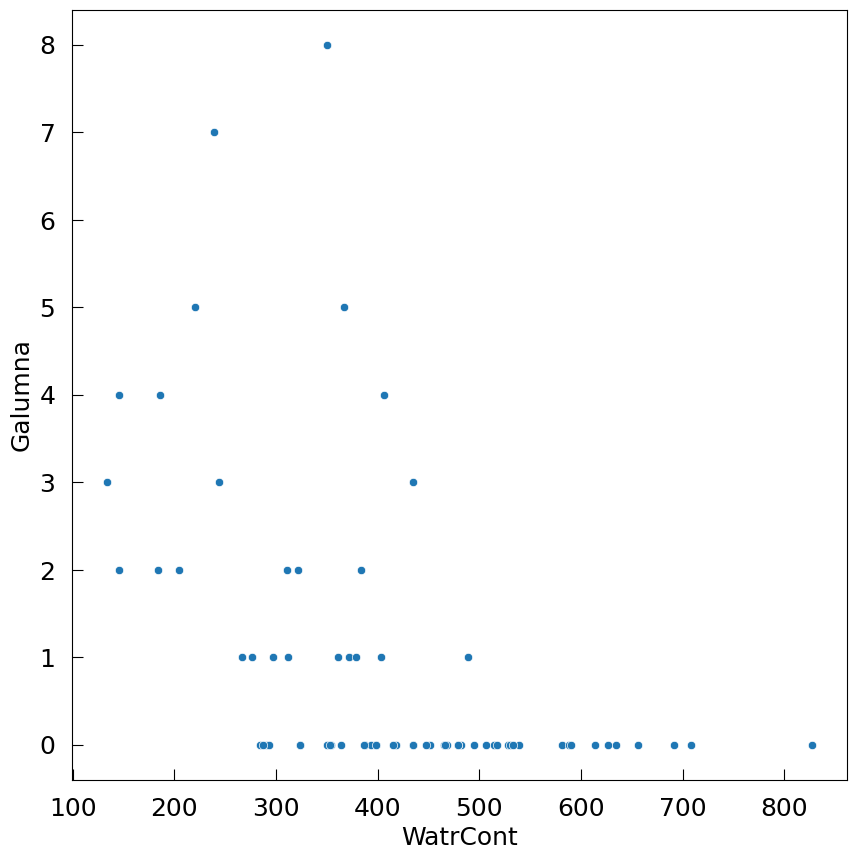

In [40]:
sns.scatterplot( mites , y = 'Galumna' , x = "WatrCont" );

We could go ahead and try our usual OLS approach:

In [41]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("Galumna ~ WatrCont" , data = mites)# we create the least square fit object
model = model.fit()#we do the actual fit

print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:                Galumna   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     22.31
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.21e-05
Time:                        11:42:55   Log-Likelihood:                -127.32
No. Observations:                  70   AIC:                             258.6
Df Residuals:                      68   BIC:                             263.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4393      0.556      6.188      0.0

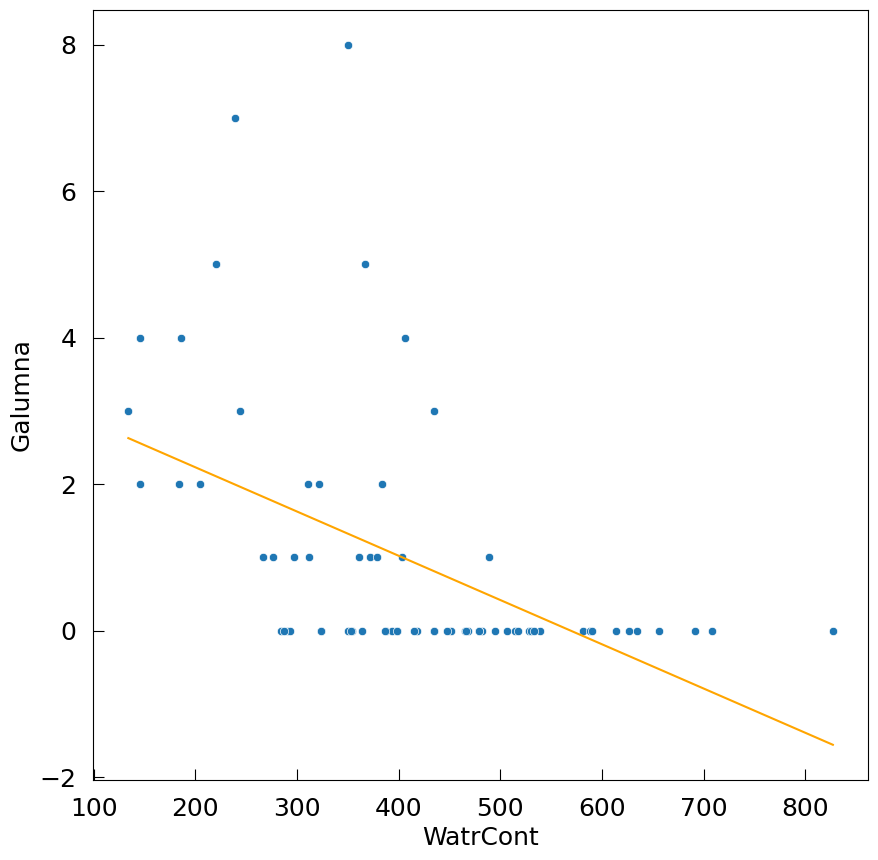

In [46]:
sns.scatterplot(mites, y = 'Galumna', x = "WatrCont")

x = np.linspace(mites.WatrCont.min(), mites.WatrCont.max(), 100)
plt.plot(x,  model.predict({"WatrCont" : x}), color = 'orange');

**micro-exercise: what are the problems there ?** (no need to draw additionnal plots)


<br>

---

<br>

<br>


An alternative approach could be to **transform y** before fitting.

A classical transformation would be to compute the logarithm of y.

Here we have many values at 0, so we typically do something like log(1+y):

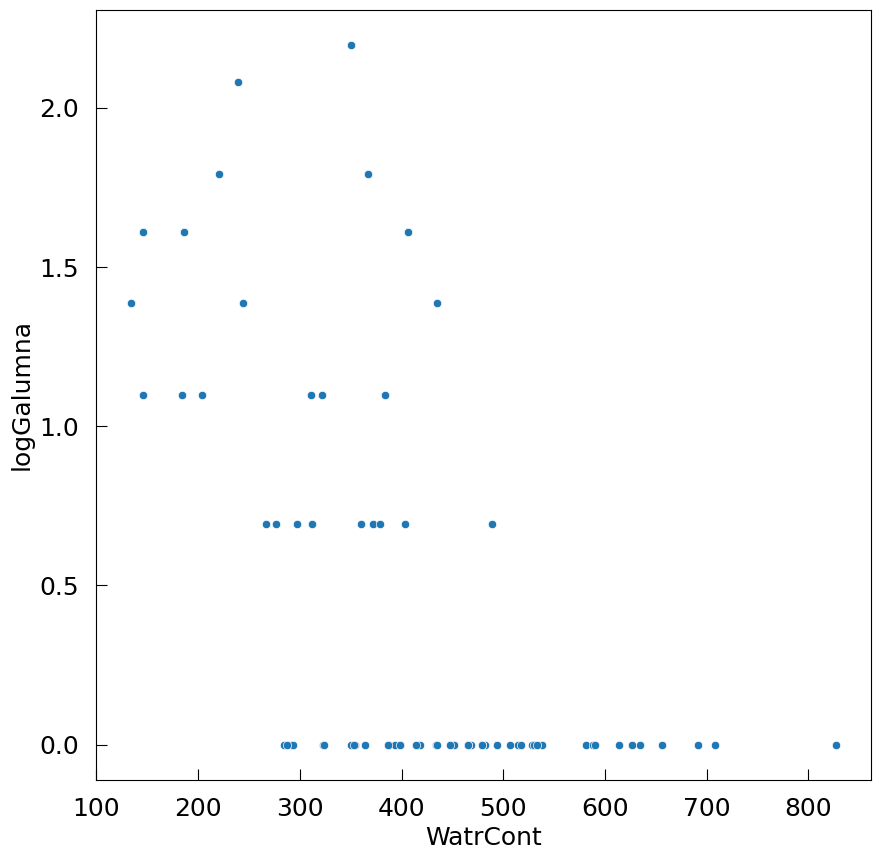

In [47]:
mites["logGalumna"] = np.log(1 + mites.Galumna)
sns.scatterplot(mites, y = 'logGalumna', x = "WatrCont");

Now, what we would model would not be :

$$ y = \beta X $$

but rather, (ignoring the +1 for now):

$$ log(y) = \beta_0 + \beta X $$

Which is equivalent to:

$$ y =   e^{\beta_0} * e^{\beta X} $$

$e^{\beta_0}$ is a fixed term and can be noted $y_0$:

$$ y =   y_0 * e^{\beta X} $$


So you can see that by transforing our response variable we have drastically changed the nature of our model.


> with the +1 accounted for, we have : $ y =   y_0 * e^{\beta X} - 1 $



In [49]:
model = smf.ols("logGalumna ~ WatrCont" , data = mites)# we create the least square fit object
model = model.fit()#we do the actual fit

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             logGalumna   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     35.27
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.09e-07
Time:                        11:45:10   Log-Likelihood:                -52.746
No. Observations:                  70   AIC:                             109.5
Df Residuals:                      68   BIC:                             114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4996      0.192      7.829      0.0

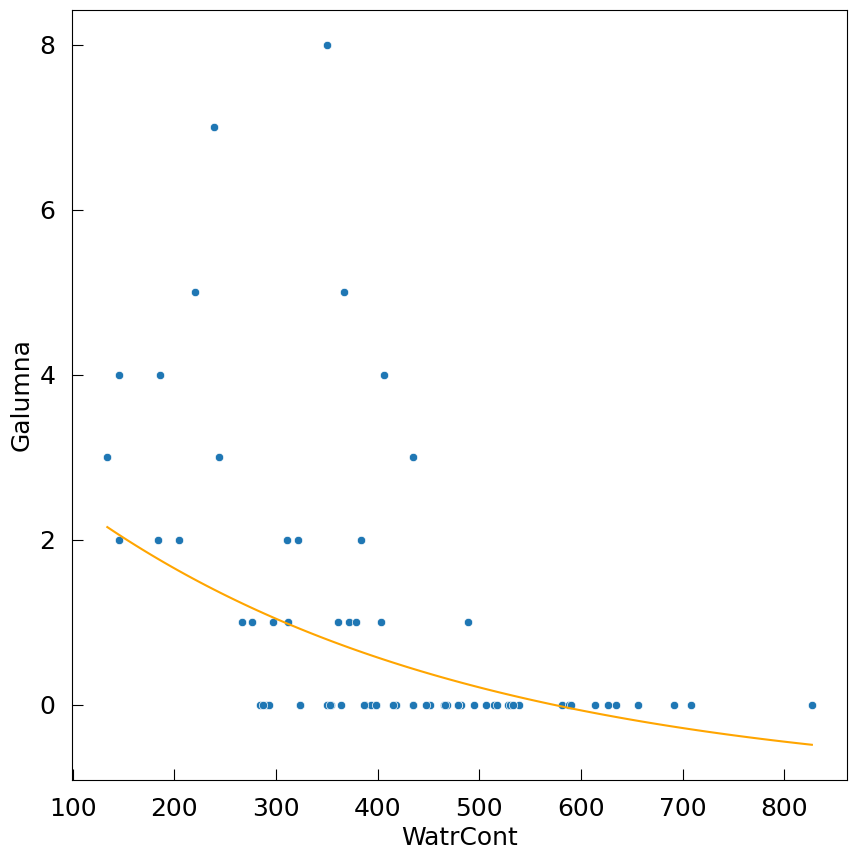

In [50]:
sns.scatterplot(mites, y = 'Galumna', x = "WatrCont")
x = np.linspace(mites.WatrCont.min(), mites.WatrCont.max(), 100)
log_y_pred = model.predict({"WatrCont" : x })
y_pred = np.exp(log_y_pred) - 1 ## transform back the data
plt.plot(x, y_pred, color = 'orange');

Here you can see it is a bit better but there are still outstanding issues.


But as we will see, by **transforming the response variable** we have already taken a big step toward GLMs.


[Back to ToC](#toc)

## Let's define what is the modeling process behind GLM <a id = '3.3'></a>

If you remember, to use our Maximum Likelihood Estimator method, we spent a lot of time before saying that we were looking to solve a very specific kind of problem : one where we wanted to fit the mean of $\pmb Y_i$ knowing some value $\pmb X_i$ , and that there was some gaussian noise $\mathcal{N}(0,\sigma^2)$ around the mean of $\pmb Y_i$.

In mathematical term we were modeling our problem with the following distribution:

$$P(\pmb Y_i|\pmb X_i)=\mathcal{N}(\pmb X_i^{T}\pmb\beta,\sigma^2)$$

On which we were using Maximum Likelihood Estimation 

Thus so far, we have restricted ourselves to purely straightforward linear relations between the mean of $\pmb Y_i$ conditional to $\pmb X_i$ i.e.:

$$\mu(\pmb Y_i)=\mathbb{E}(\pmb Y_i|\pmb X_i)=(\pmb X_i^{T}\pmb\beta)$$


We have also only looked at case where the noise was normaly distributed : hence the $\mathcal{N}$ above. 

Under some conditions (i.e your random component is part of the exponential distribution family) you can relax those conditions.

Remember, as we want to use linear models the only thing we can not change is our fitting using $\pmb X_i^{T}\pmb\beta$. But this linear relationship doesn't have to apply to the conditional mean $\mu(\pmb X_i)$ but instead to a function of that conditional mean:

$$g(\mu(\pmb Y_i))=\pmb X_i^{T}\pmb\beta$$

**$g$ is called the link function**, and we will investigate a little bit more what it can be and why it is useful. 


Another possibility is that rather than a normal distribution we could also look for a more general distribution to model the noise induced by the interaction between our $\pmb Y_i$ and $\pmb X_i$:

$$P(\pmb Y_i|\pmb X_i)=\mathcal{D}(g^{-1}(\pmb X_i^{T}\pmb\beta),\sigma^2)$$

Where $\mathcal{D}$ is a distribution that makes sense to model our $\pmb Y$ random variable, and $g^{-1}$ the inverse of the link function.

And on top of that we could still work with our Maximum Likelihood Estimator method.



But first-off, let us demonstrate **how the classical Linear Model (OLS) can be seen as a particular case of  Generalized Linear Model** :

In [52]:
modelOLS = smf.ols("logGalumna ~ WatrCont", data= mites) # classical linear model OLS

# a GLM with gaussian error model, and identity as a link function
modelGLM = smf.glm("logGalumna ~ WatrCont", data= mites,
                   family=sm.families.Gaussian( sm.families.links.Identity()))


resultsGLM = modelGLM.fit()#we do the actual fit
resultsOLS = modelOLS.fit()#we do the actual fit

print(resultsOLS.summary())
print(resultsGLM.summary())

                            OLS Regression Results                            
Dep. Variable:             logGalumna   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     35.27
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.09e-07
Time:                        11:46:03   Log-Likelihood:                -52.746
No. Observations:                  70   AIC:                             109.5
Df Residuals:                      68   BIC:                             114.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4996      0.192      7.829      0.0

We will explain all these new metrics later, but you can see that :
 * the Log-Likelihood is the same
 * the parameter estimates are the same 
    
**So an OLS is a GLM with a gaussian noise and an identity link**

Now, let's see which models we would use to better model this data:

**In our first example about count of Galumna individuals, the GLM would have perfom a maximum likelihood on the following distribution:**

$$P(n( w ) | w )=\mathcal{P}(n_0 * e^{\beta w })$$

Which is a poisson distribution ($\mathcal{P}$) with mean $n(w)= n_0 e^{\beta w}$.

You can note that the function $g^{-1}$ is: $ \pmb tw^{T}\pmb\beta\rightarrow n_0 * e^{\beta w}$, 

and $g:n(w) \rightarrow log(n_0)+\beta w$

So the family is a **Poisson** distribution, and the link is the **log** function.

[Back to the ToC](#toc)

## a Poisson model GLM on the mites data  <a id='3.4'></a>

Now let's see how to do the same thing in `statsmodels` :

In [53]:
modelPoisson = smf.glm("Galumna ~ WatrCont", data= mites,
               family=sm.families.Poisson(link = sm.families.links.Log()))# family=Poisson link=log
modelPoisson = modelPoisson.fit()#we do the actual fit


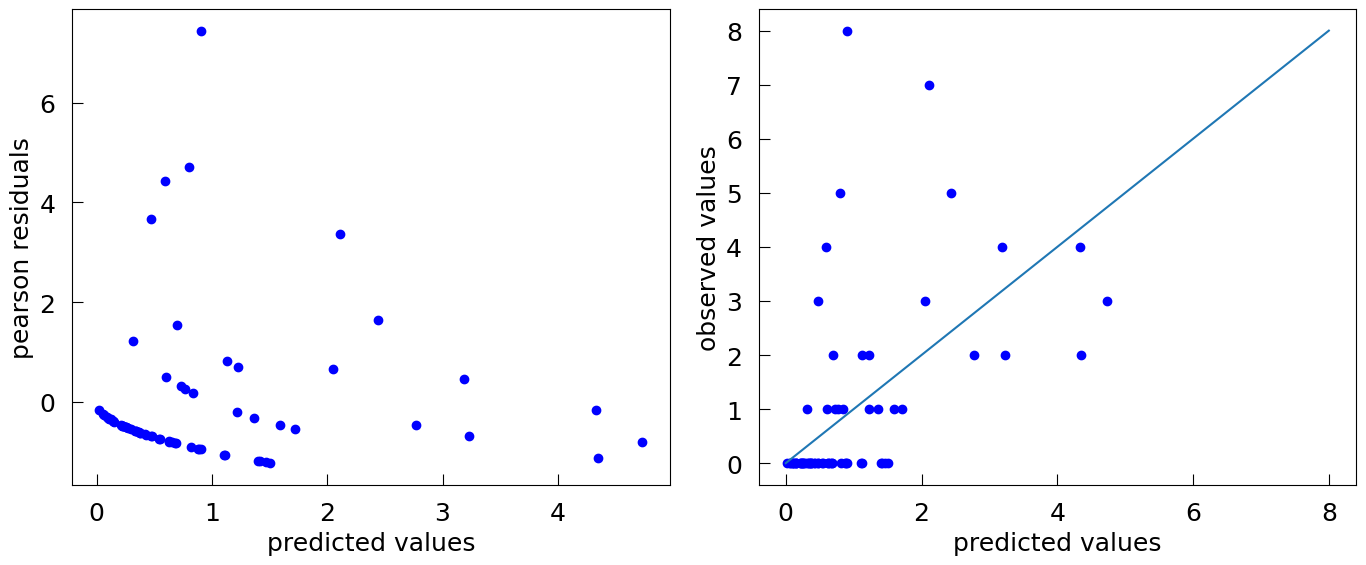

In [55]:
# adding a couple of diagnostic plots
fig, ax = plt.subplots(ncols=2,figsize=(14,6))
ax[0].plot(modelPoisson.mu, modelPoisson.resid_pearson, 'bo')
ax[0].set_xlabel("predicted values")
ax[0].set_ylabel("pearson residuals")

ax[1].plot(modelPoisson.mu, mites.Galumna, 'bo')
ax[1].plot([0,max(mites.Galumna)], [0,max(mites.Galumna)])
ax[1].set_xlabel("predicted values")
ax[1].set_ylabel("observed values")

plt.tight_layout()


In [58]:
## printing the fit summary
res=modelPoisson.summary()
print(res)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Galumna   No. Observations:                   70
Model:                            GLM   Df Residuals:                       68
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.608
Date:                Wed, 04 Dec 2024   Deviance:                       108.05
Time:                        11:47:09   Pearson chi2:                     157.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5768
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5794      0.327      7.895      0.0


Note that , in this summary, you don't see those F-statistic and t-test reports. Of course, since the noise is not normally distributed anymore.

An important point to make is that the stringent constraints of the classical OLS result in a number of statistical properties that allows a lot of inference to be made, in partcular with regards to testing the significance of parameter values and comparing (nested)  models.

In GLMs, things are not so clear cut, and the tools we use to evaluate a model are a bit different.


Instead of the t-statistic you get a **z-statistic instead, which is coming from a Wald test**, with the null hypothesis being that the estimate is 0. This Wald test relies on the computation of the curvature of the log-likelihood function to get the confidence interval on the estimators as well as it's standard error.

You might have also noticed that there is no $\pmb R^2$ anymore. 
Instead you have : 
 * the **Deviance** : it is a way to generalize the concept of $\pmb R^2$ and could be summarized as the log likelihood ratio between a fully saturated model (ie., a model with as many parameters as points) and our model.
      $$2*(logL(saturated model)-logL(fitted model))$$ 
      
 * the **Pearson Chi2** : This corresponds to the sum of the squared **Pearson residuals**. Pearson's residuals correspond to the difference between the predicted and observed value, divided by the expected standard deviation of the predicted value. Contrary to normal residuals (also called *response residuals*), they account for the fact the noise function does not necessarily has a constant variance across the data.

You want these two numbers to be as low as possible. By themselves, they are not always easy to interpret. 

When the sample size is large enough, the Pearson Chi2 should follow a Chi-square distribution with a number of degree of freedom equal to $n-p$ (hence its name). 
In this case you could use the Pearson Chi2 to perform a **goodness-of-fit test**.

Here, unfortunately, the sample size is too low for this Chi-square distribution assumption (see the end of this notebook for how we know this).

This is why we also have to rely on the **diagnostic plots** (pearson residuals against predicted values, and observed values against predicted values).



**Parameters interpretation**

In this model, we can see that both parameters are significantly different from 0.
Remember our model equation is $n(t)=n(0)e^{\beta t}$.
* $n_0$, the theoretical number of Galumna individual for a water content of 0,  corresponds to `np.exp(Intercept)` $\sim 13.19$
* $\beta$, the growth/decay rate, corresponds to `WatrCont` $= -0.0076$



Let's plot this new model along side the log-transformed OLS one.

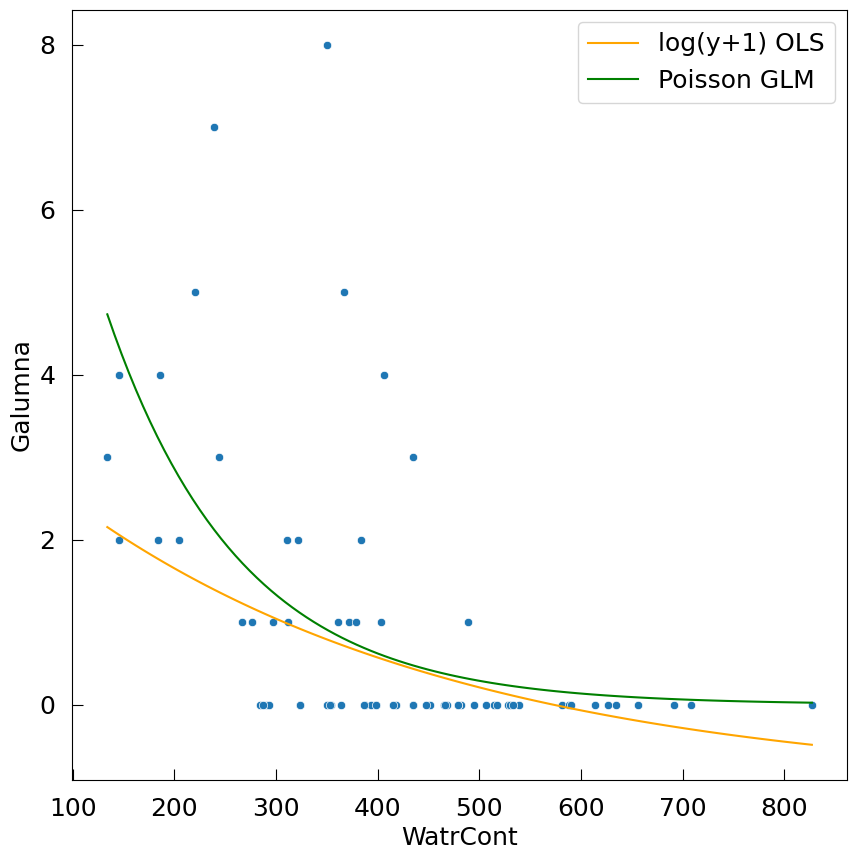

In [60]:
sns.scatterplot(mites, y = 'Galumna', x = "WatrCont")

x = np.linspace(mites.WatrCont.min(), mites.WatrCont.max(), 100)

## log-transformed OLS
log_y_pred = model.predict({"WatrCont" : x })
y_pred = np.exp(log_y_pred) - 1 ## transform back the data
plt.plot(x, y_pred, color = 'orange', label = 'log(y+1) OLS')

## poisson GLM
plt.plot(x, modelPoisson.predict({"WatrCont" : x }), color = 'green', label = 'Poisson GLM')

plt.legend();

Our new model, taking into account the Poisson statistic of our response variable is doing quite better ! 


We can see that the OLS gravely underestimate the number of individuals for low water content and can give non-sensical negative values later on.


Nevertheless, we can still see that for medium water content (water content ~300 to 450), our model does not necessarily reflect the high variance we observe.


This can be due to :
 * another covariable influencing the results
 * a problem with our modelling process


Indeed, **Poisson random variable have their mean and variance equal** : that is a fairly strong requirement !

To investigate this, in the next pair of plots I used a sliding window centered around each point, to calculate the mean and the variance at each point.

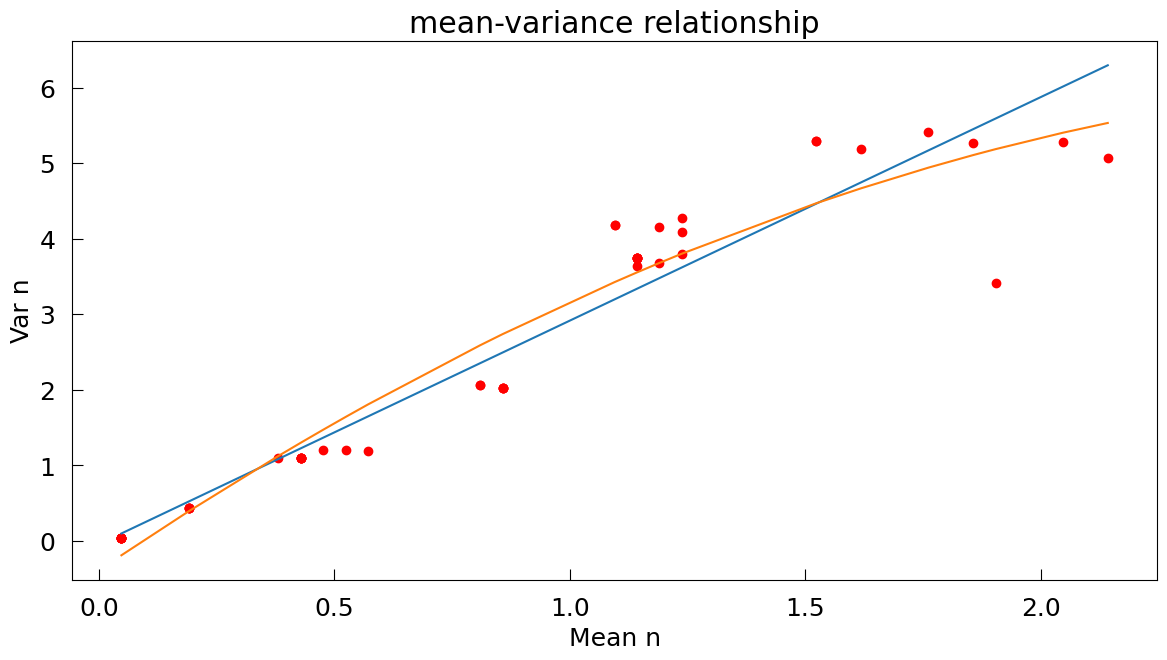

In [61]:
interv=10 #number of points to the right and to the left we look at to deduce the local mean and variance

## number of F.occidentalis ordered by elevation
n=np.array(mites.Galumna)[np.argsort(modelPoisson.mu)]

df = pd.DataFrame({'local_means' : [np.mean(n[v-interv:v+interv+1]) for v in range(interv, len(n)-interv, 1)],
                   'local_vars' : [np.var(n[v-interv : v+interv+1]) for v in range(interv, len(n)-interv, 1)]})
df.sort_values(by = "local_means", inplace=True)

df['local_means2'] = df['local_means']**2


linearfit = smf.ols("local_vars ~ local_means", data=df).fit().fittedvalues
squarefit = smf.ols("local_vars ~ local_means + local_means2", data=df).fit().fittedvalues


fig, ax = plt.subplots(figsize=(14,7))

ax.plot(df.local_means,
        df.local_vars,'ro')
ax.plot(df.local_means, linearfit, label = 'linear')
ax.plot(df.local_means, squarefit, label = 'square')
ax.set_xlabel('Mean n')
ax.set_ylabel('Var n')
ax.set_title('mean-variance relationship');

A linear link between the mean and the variances seems OK, but clearly, there is not a 1:1 relationship between mean and variance here. There is a clear **overdispersion**.


This sort of situation could be handled with a GLM with another family : [negative binomial regression](https://timeseriesreasoning.com/contents/negative-binomial-regression-model/)

[back to the ToC](#toc)

## Practical case 2 : Relation between the presence of  kyphosis and and a few covariates <a id='3.2'></a>

Let's try to model the chance to develop kyphosis (abnormally excessive convex curvature of the spine) after undergoing a surgical operation that aims at preventing it, according to 3 features :
* age of the patient in months, 
* the number of vertebrea involved in abnormal curvature, 
* where that abnormal curvature starts on the vertebrae. 

In [62]:
df_kyphosis=pd.read_csv('data/kyphosis.csv')
# replace present/absent with 1/0
df_kyphosis["Kyphosis_0_1"]=[1 if v=="present" else 0 for v in df_kyphosis["Kyphosis"]]
df_kyphosis.drop(columns="Kyphosis",inplace=True)
df_kyphosis.head()

Age  Number  Start  Kyphosis_0_1
0   71       3      5             0
1  158       3     14             0
2  128       4      5             1
3    2       5      1             0
4    1       4     15             0

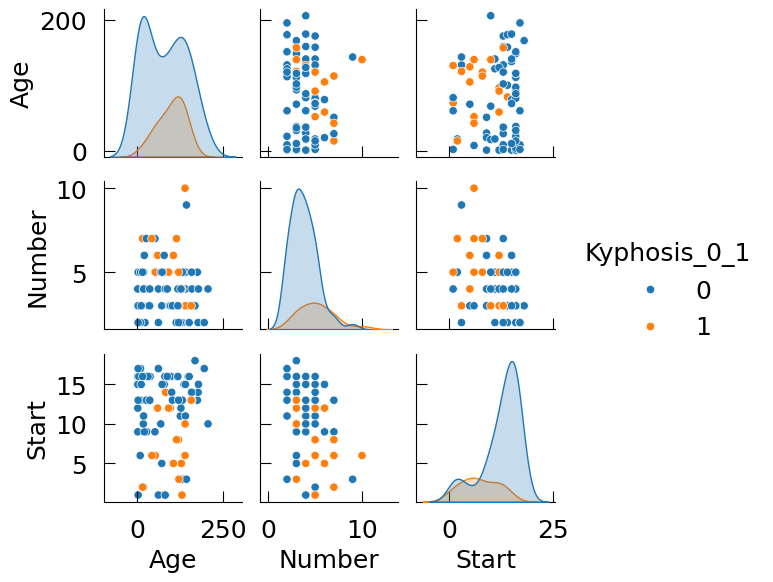

In [64]:
sns.pairplot(df_kyphosis, hue="Kyphosis_0_1", height=2, aspect=1);
#plt.tight_layout()

Here **the variable we are interested in is either 0 or 1**, and could be seen as the outcome of a bernouilli experiment as it is a binary choice. 

So inherently you already run into a problem here : how do you write a continuous linear function that will give you values between 0 and 1 (close to zero when kyphosis is absent and close to one when kyphosis is present)...

Moreover, again, since you have a bernouilli random variable your mean and your variance are dependant... How are we going to model the absence or presence of kyphosis?


**Let's see how using OLS here makes no sense**

In [65]:
model = smf.ols("Kyphosis_0_1 ~ Age + Number + Start", data = df_kyphosis)
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:           Kyphosis_0_1   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     8.900
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.91e-05
Time:                        11:50:07   Log-Likelihood:                -30.107
No. Observations:                  81   AIC:                             68.21
Df Residuals:                      77   BIC:                             77.79
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2612      0.193      1.351      0.1

Now let's check what the predicted values are for this model:

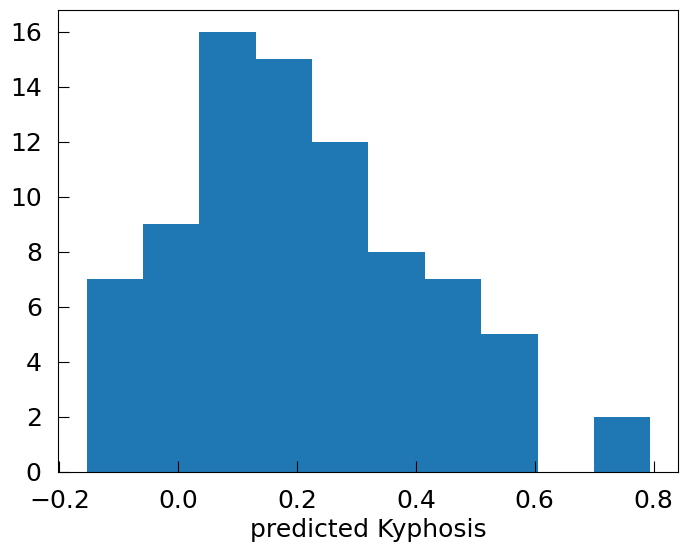

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(list(results.fittedvalues), 10)
ax.set_xlabel("predicted Kyphosis");

**Those are some irrational values for Kyphosis_1_0**


Once again a way to start tackling your problem is to **transform your variable of interest**, here kyphosis being present or not. Let's write $p$ the probablity that kyphosis is present (Y=1) and thus $1-p$ is the probablity that kyphosis is absent (Y=0). In a bernouilli statistic this $p$ also stand for the average of having Y=1.

The transformation we are going to look at is the log transform of the odds ratio (**logit**):

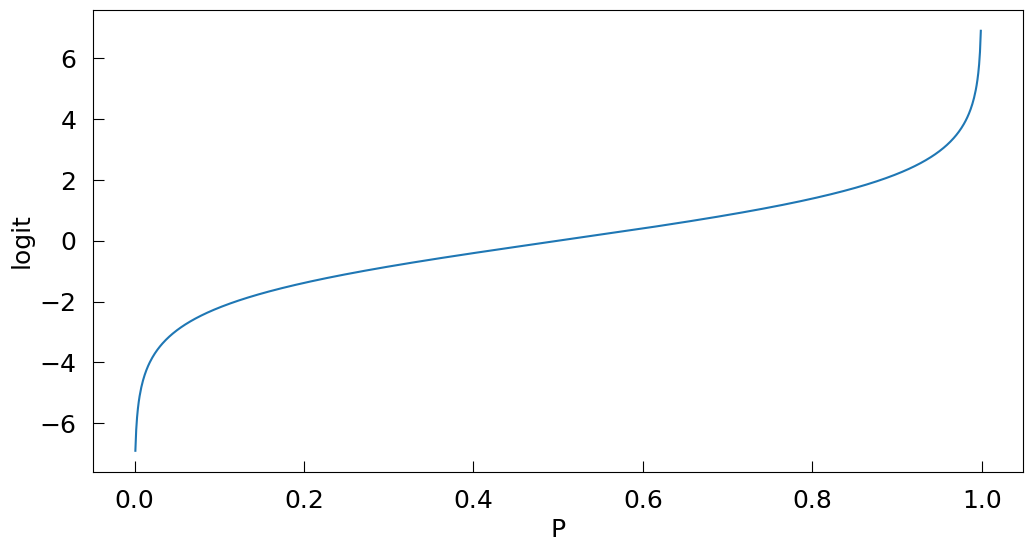

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
P = np.linspace(0.001,0.999,999)
ax.plot(P, np.log(P / (1-P)))
ax.set_xlabel('P')
ax.set_ylabel('logit')
plt.show()

So we say that :

$$ln{\frac{p_i}{1-p_i}}=\beta_{0}+\Sigma_{j=1}\beta_{j}x_{j}=\pmb X^T\pmb\beta$$

which translates to

$$p_i=\frac{1}{1+e^{-(\beta_{0}+\Sigma_{j=1}\beta_{j}x_{j})}}$$

So this last equation shows you how we transformed our linear combination of covariables into an outcome between 0 and 1 that relates to the mean of a Bernouilli distribution (if you remember that before we work on relating linearly our covariable to the mean of a gaussian you might see where I am going with that, if not, no worries).


You can see that we change quite a lot the variable of interest: now it's $p$ and it's not an integer just like our `Kyphosis_0_1`. 
Here more than before we drastically shift from modeling the variable to modeling its mean. 
Also, we cannot straight away go from `Kyphosis_0_1` to $p$ (but at least I can show you why it doesn't work). 

We already know that our variable is coming from a bernouilli experiment. So a good approach would be to fit a bernouilli distribution with parameter (mean) $p_i=\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}}$, along the curve of our data (juste like what we did for the maximum likelihood with gaussian noise).

As you will see this is exactly what GLM does

**In our second example about kyphosis GLM would also simply perform maximum likelihood on the following distribution:**


$$P(\pmb K_i|\pmb X_i)=\mathcal{B}(\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}})$$

Where $\mathcal{B}$ is the Bernouilli distribution, and $\frac{1}{1+e^{-(\beta_{0}+\Sigma^{n}_{j=1}\beta_{j}x_{j})}}$ corresponds to $p$ in the context of a log-odds-ratio transform.

So the family is a particular **Binomial** distribution, and the link is the **logit** function

[Backto to the ToC](#toc)

## Let's apply this to the kyphosis data <a id='3.5'></a>

In [72]:
model = smf.glm("Kyphosis_0_1 ~ Age + Number + Start" , data = df_kyphosis,
                family=sm.families.Binomial(link = sm.families.links.logit()))
# we use a Binomial here even though our cariable is Bernouilli.
# Because a Binomial with number of try = 1 is a Bernouilli variable,
# and since we are not providing a number of tries here, the function
# by defafault understands that we want indeed Bernouilli

results = model.fit()#we do the actual fit

/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/data-analysis/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning:

The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.



In [73]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Kyphosis_0_1   No. Observations:                   81
Model:                            GLM   Df Residuals:                       77
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30.690
Date:                Wed, 04 Dec 2024   Deviance:                       61.380
Time:                        11:51:09   Pearson chi2:                     70.3
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2365
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0369      1.450     -1.405      0.1

**Parameter interpretation**

Our model is $log( \frac{p_i}{(1-p_i)} ) = constant + Age * Age_i + Number * Number_i + Start * Start_i$

So an increment of 1 in age, for instance, will result of an increment of $Age$ in the log odds-ratio, so a multiplication of the odds-ratio by $exp(Age)$.
Note that change in odds-ratio are not that easy to interpret, but the direction and magnitude of the parameters still gives you an information.


In [75]:
def applyOddsRatioFactor(p, factor):
    OR0 = p/(1-p)
    OR1 = OR0*factor
    return OR1/(1+OR1)

# let's compute the effect of a 10 months difference of age
# 1 months age effect : 0.0109
factor = np.exp(0.0109 * 10)
print('factor', factor)
for p in np.linspace(0.1, 0.9, 9):
    p1 = applyOddsRatioFactor(p , factor)
    relativeRisk = p1/p
    print( '{:.1f} -> {:.3f}\t, RR: {:.2f}'.format(p, p1, relativeRisk))


factor 1.1151623503414478
0.1 -> 0.110	, RR: 1.10
0.2 -> 0.218	, RR: 1.09
0.3 -> 0.323	, RR: 1.08
0.4 -> 0.426	, RR: 1.07
0.5 -> 0.527	, RR: 1.05
0.6 -> 0.626	, RR: 1.04
0.7 -> 0.722	, RR: 1.03
0.8 -> 0.817	, RR: 1.02
0.9 -> 0.909	, RR: 1.01


Nevertheless, given these parameter values, we are able to provide estimates for the probability of kiphosis.

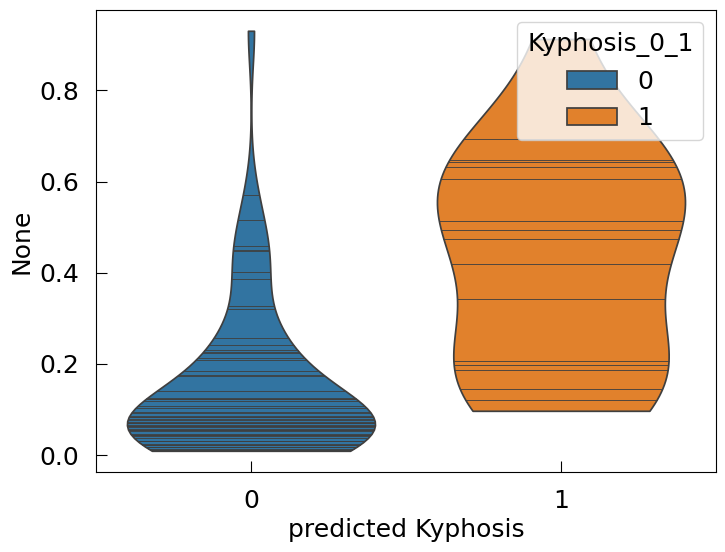

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(y = results.fittedvalues, x=df_kyphosis.Kyphosis_0_1, hue = df_kyphosis.Kyphosis_0_1,
               cut = 0, ax = ax,  inner="stick")
ax.set_xlabel("predicted Kyphosis");

[Back to ToC](#toc)

## model testing - demonstration on the kyphosis data-set <a id="3.6"></a>

The summary of the model for the kyphosis suggest that the parameter associated with `Number` is arguably not significantly from 0. 
So, **we may be tempted to exclude this measurment from our model**.

This could be quite interesting if, for instance, obtaining this measurment was somewhat costly or painful to the patient. 

Furthermore, it is also informative for our undertanding of the underlying process to know whether or not this co-variable has a measurable effect on our ability to predict the variable of interest.

Let's test how the model without the `Number` compares :

In [77]:
modelReduced = smf.glm("Kyphosis_0_1 ~ Age + Start" , data = df_kyphosis,
                family=sm.families.Binomial( link = sm.families.links.logit()))


resultsReduced = modelReduced.fit()#we do the actual fit

print(resultsReduced.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Kyphosis_0_1   No. Observations:                   81
Model:                            GLM   Df Residuals:                       78
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32.650
Date:                Wed, 04 Dec 2024   Deviance:                       65.299
Time:                        11:52:19   Pearson chi2:                     67.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1986
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2250      0.751      0.300      0.7

/nfs/cds-peta/exports/biol_micro_cds_gr_sunagawa/scratch/vbezshapkin/conda-envs/data-analysis/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning:

The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.



Here, the models are **nested**, so we will use a Likelihood Ratio Test to compare the reduced model with the previous one:

In [80]:
logLkhDiff = 2*(results.llf - resultsReduced.llf)
# NB equivalent to : resultsReduced.deviance - results.deviance , in some cases
dof = results.df_model - resultsReduced.df_model

pval = 1-stats.chi2.cdf(logLkhDiff, df=dof)
print('log-likelihood difference:', logLkhDiff )
print('Degrees of freedom:', dof)
print("\tp-value for a chi-square distribution:", pval)

log-likelihood difference: 3.919139663224449
Degrees of freedom: 1
	p-value for a chi-square distribution: 0.047739305294085765


[Back to ToC](#toc)

## Predicting kyphosis  <a id="3.7"></a>

For each patient we have now a probability that this patient will develop Kyphosis. From here we can put a threshold that will tip our decision to **classify** our patient as prone to develop Kyphosis or not.

In [82]:
# a naive approach : predict a kyphosis when the probability is >0.5
predictedKyphosis = results.mu > 0.5
pd.crosstab(predictedKyphosis, df_kyphosis.Kyphosis_0_1) # cross the results with the obersved data.

Kyphosis_0_1   0   1
row_0               
False         61  10
True           3   7

So, what does this classification tells you about the ability of our model to predict Kyphosis? Would you trust it to make a decision on a patient?

Bear in mind that this is the **performance on the data that was used to create the model**. We could ask how well we expect these results to translate with new data.

Anyhow, notice the use of the word **classify**. Classification is a notion that we will develop next, from a **machine learning** perspective. But remember that in that particular case called classification by logistic regression, under the hood the problem is still a problem of regression through a  modelisation using Generalised Linear Model.

In the next lessons, we will spend some time introducing key concepts of the classical machine learning framework, through **classification and regression**.


[back to the toc](#toc)

<br>

# Exercise on GLM :  a dose-response problem <a id='2'></a>


In the following dataset we would like to model the death rate of beetles due to some pesticide concentration.

In [83]:
import scipy.stats

np.var(stats.binom(n = 600, p = 0.217).rvs(10**4) / 600)

0.0002837623319722222

In [84]:
np.var(stats.binom(n = 6, p = 0.217).rvs(10**4) / 6)

0.027829655277777778

In [21]:
df_beetles=pd.read_csv('data/beetle.csv' , index_col=0)
df_beetles


dose  nexp  ndied   prop  nalive
1  49.1    59      6  0.102      53
2  53.0    60     13  0.217      47
3  56.9    62     18  0.290      44
4  60.8    56     28  0.500      28
5  64.8    63     52  0.825      11
6  68.7    59     53  0.898       6
7  72.6    62     61  0.984       1
8  76.5    60     60  1.000       0

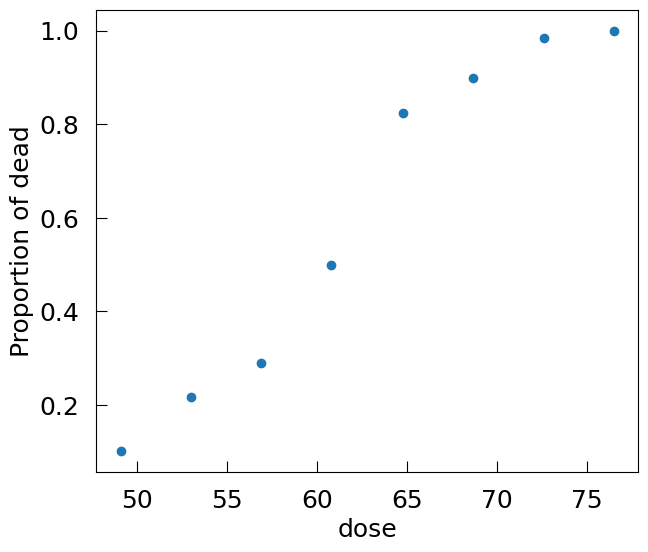

In [87]:
fig, ax = plt.subplots(ncols=1,figsize=(7,6))
ax.scatter( df_beetles["dose"], df_beetles["prop"])
ax.set_xlabel('dose')
ax.set_ylabel('Proportion of dead');

Using what You have learned, build a model of the number of dead and alive beetles 
depending on the insecticide dose.

Here is a tentative path you may follow:
1. decide on a relevant model family given the quantity you want to model
2. create and fit your model
3. inspect the results of your fitting
4. plot the predictions of your model with the observed data

**IMPORTANT NOTES**

* Here you can see that the number of bettle is not always exactly the same (from 56 to 63).
* It is possible to have several predicted variable in your model.

**option 1 : using different matrices for target / covariables**
```
y=df_beetles[["ndied","nalive"]]
```
**option 2 : R-style formula**:
```
" ndied + nalive ~ ... "
```



Solution - reading the data:

In [23]:
# %load -r -7 solutions/solution_02_01.py

Solution - setting up the model:

In [24]:
# %load -r 8-15 solutions/solution_02_01.py

Solution - diagnostic plot:

In [59]:
# %load -r 16-31 solutions/solution_02_01.py

Solution - plotting the results:

In [1]:
# %load -r 32- solutions/solution_02_01.py


[back to the toc](#toc)

<br>

# Annex : is the Pearson chi2 adapted for the mites data <a id='A0'></a>

The theory goes that if the model is correct,and if the sample size is large enough, then the sum of the squares of the **pearson residuals** (residuals scaled by the standard deviation of the predicted values) should follow a chi-square distribution with a number of degrees of freedom equal to $n-p$ (number of points - number of parameters).

`statsmodels` reports this sum of squares as `Pearson Chi2`.

The problem is "*the sample size is large enough*" does not have a clear cut limit. It is quite dependent on the model type and the values of this parameter. So to test this hypothesis we propose a simulation strategy.

The idea is that we take the model, and use it to simulate a lot of data-set, and then compute the Pearson Chi2 for each of this simulated data-set.
If the sample size is large enough, then the simulated Pearson Chi2 will follow the expected Chi-square distribution.



In [85]:
%%time
PEARSONCHI2 = []


n = len(mites.WatrCont)

for i in range(10**3):

    ## simulate some WatrCont value (X)
    x = np.random.uniform( mites.WatrCont.min() , mites.WatrCont.max() ,  size = n)

    ## mu corresponding to the X according to our model
    mus = modelPoisson.predict( {"WatrCont":x} )

    ## simulate Y from this
    y = np.random.poisson( mus )


    pearsonResiduals = (mus - y)/np.sqrt(mus)
    #NB: this formula works for for poisson models because the variance of prediction
    #   is equal to its mean

    pearsonChi2 = sum( np.power( pearsonResiduals , 2 ) )

    PEARSONCHI2.append( pearsonChi2 )


CPU times: user 1.02 s, sys: 691 µs, total: 1.02 s
Wall time: 1.03 s


fraction of rejected tests at alpha=0.05 : 0.218
K-S test of observed distribution of deviance with a chi2 with n-2 df : 5.171504837480997e-35


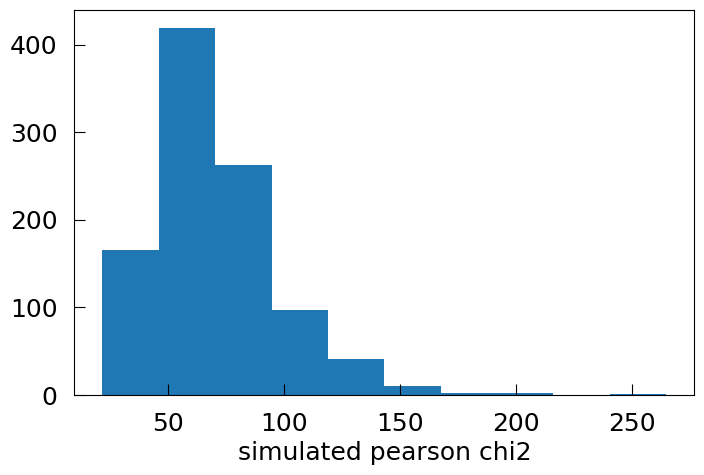

In [86]:
import scipy.stats as stats
fig, ax = plt.subplots(ncols=1,figsize=(8,5))
ax.hist(PEARSONCHI2)
ax.set_xlabel("simulated pearson chi2")

pvals = 1-stats.chi2.cdf(PEARSONCHI2,df=n-2)
print( "fraction of rejected tests at alpha=0.05 :" , sum(pvals < 0.05)/len(pvals) )
print("K-S test of observed distribution of deviance with a chi2 with n-2 df :" ,
      stats.kstest( PEARSONCHI2 , lambda x : stats.chi2.cdf(x , df = n-2) ).pvalue )

Clearly, this does not follow a Chi2, so the sample is not "large enough" for this property to be true.

[back to the toc](#toc)

<br>

## Annex : Additionnal Practical case : exponential growth of Corona virus infection <a id='A1' ></a>

In this dataset we follow the spread of covid cases over time. We would like for example to understand what is the growth rate of cases.

In [6]:
df_corona_exp=pd.read_csv('data/exponential_covid.csv')
df_corona_exp["Days"]=df_corona_exp.index
df_corona_exp.drop(columns="Time",inplace=True)
df_corona_exp.head()

Infections  Days
0           1     0
1           1     1
2           2     2
3           2     3
4           5     4

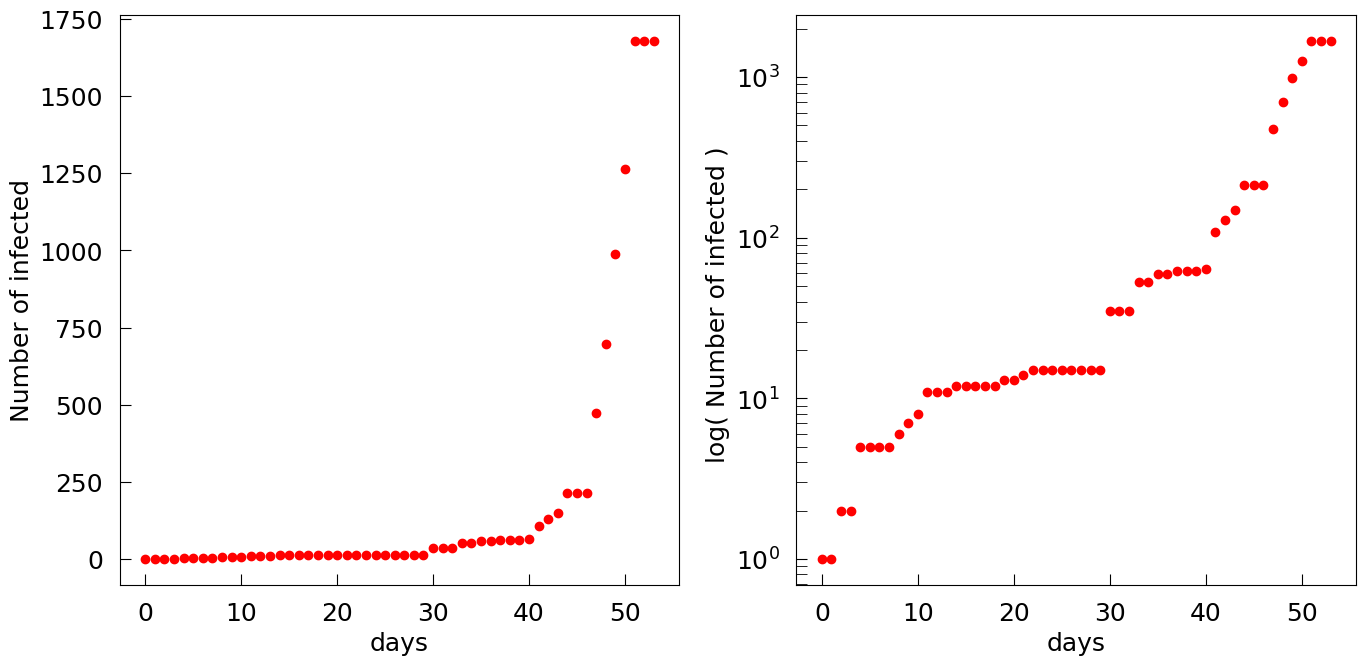

In [7]:
fig, ax = plt.subplots(ncols=2,figsize=(14,7))
ax[0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'ro')
ax[0].set_xlabel('days')
ax[0].set_ylabel('Number of infected')

ax[1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'ro')
ax[1].set_xlabel('days')
ax[1].set_ylabel('log( Number of infected ) ')
ax[1].set_yscale('log')
plt.tight_layout()

So here looking at the data, and with a little bit of domain knowledge we are looking at model of the kind $$n(t)=n(0)e^{\beta t}$$ where $\beta$ is the growth rate.  

With this kind of function it seems impossible to to be able to write $\bar{n(t)}=\pmb t^T\pmb\beta$, as we would in a ordinary linear model. 

Moreover, here $n(t)$ could follow the definition a Poisson statistic (a number of independent events during an interval t).

This would imply that there is a relationship between the mean and the variance in the number of infected person.

Consequently, this does not fit well with the different hypothesis we have seen before. 
But you can already see what kind of trick we could use to get around it : we could log transform the n. 

This is really different from what we were doing when transforming the covariables before. This time it really is the response variable that we are going to fit, which is transformed. We are not transforming the $\pmb X$ to increase our descriptional power of $\pmb Y$, but transforming $\pmb Y$, and by doing so, of course, transforming $\pmb X$.

In that case we end up with the following linear relationship:
$$n(t)=n(0)e^{\beta t} \rightarrow$$
$$log(n(t)) = log( n(0)e^{\beta t} ) = log(n(0))+\beta t$$

Looking at the relationship between the mean and the variance of our newly transformed random variable log(n), we are not sure it could be considered homoscedastic but the variation are kind of small so we could try an OLS to model the log(n(t)).

In [8]:
# creating a new column with the log( number of infected )
df_corona_exp["log_infect"]=np.log(0.1+df_corona_exp["Infections"])
df_corona_exp.head()

Infections  Days  log_infect
0           1     0    0.095310
1           1     1    0.095310
2           2     2    0.741937
3           2     3    0.741937
4           5     4    1.629241

In [9]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols("log_infect ~ Days" , data = df_corona_exp)# we create the least square fit object
results = model.fit()#we do the actual fit

res=results.summary()
print(res)

                            OLS Regression Results                            
Dep. Variable:             log_infect   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     506.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.83e-28
Time:                        14:41:48   Log-Likelihood:                -45.272
No. Observations:                  54   AIC:                             94.54
Df Residuals:                      52   BIC:                             98.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4800      0.153      3.136      0.0

In [25]:
results.params

Intercept    0.480021
Days         0.112015
dtype: float64

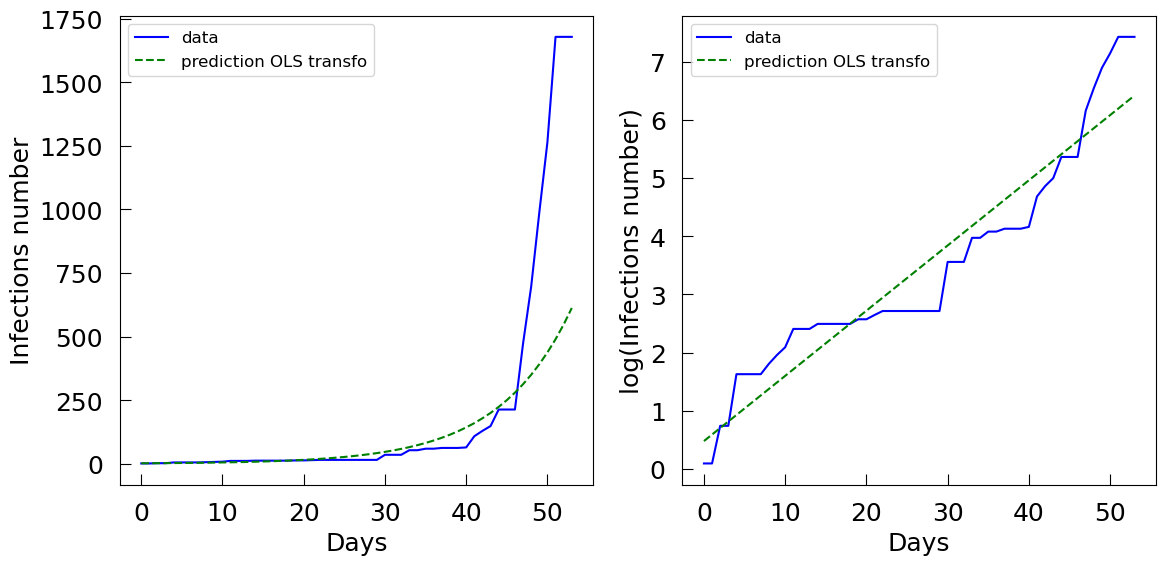

In [10]:
predictedLogInfections = results.params.Intercept + df_corona_exp["Days"]*results.params.Days
predictedInfections = np.exp(predictedLogInfections)

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
ax[0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'b-',label='data')
ax[0].plot(list(df_corona_exp["Days"]),predictedInfections,'g--',label='prediction OLS transfo')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Infections number')
ax[0].legend(loc='best',fontsize=12)

ax[1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["log_infect"]),'b-',label='data')
ax[1].plot(list(df_corona_exp["Days"]),predictedLogInfections,'g--',label='prediction OLS transfo')

ax[1].set_xlabel('Days')
ax[1].set_ylabel('log(Infections number)')
ax[1].legend(loc='best',fontsize=12)
plt.tight_layout()

We could also look at the predicted values versus the observed ones:

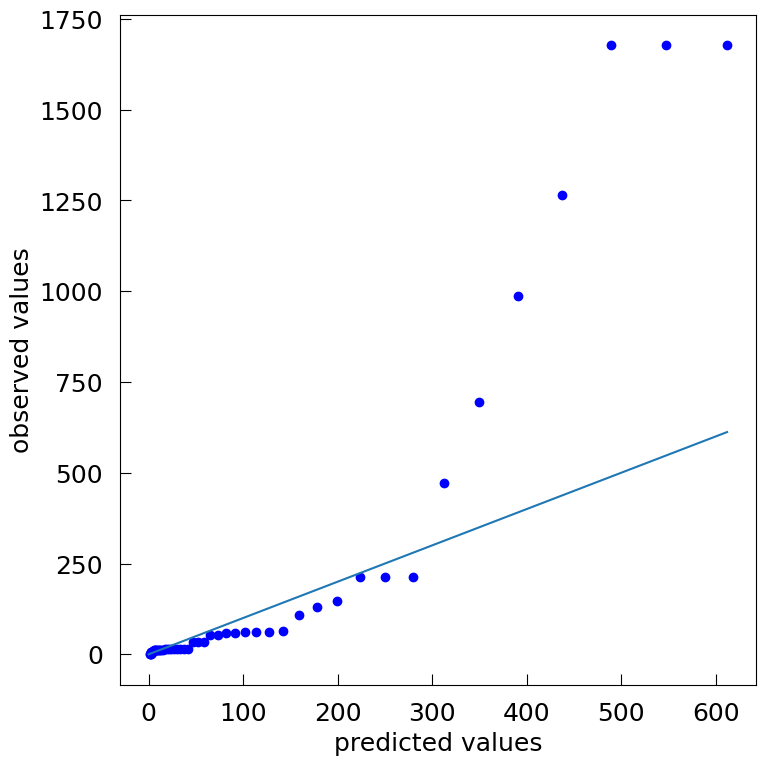

In [27]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(predictedInfections , df_corona_exp["Infections"] , 'bo')
ax.plot( [0,max(predictedInfections)], [0,max(predictedInfections)] )
ax.set_xlabel("predicted values")
ax.set_ylabel("observed values")

plt.tight_layout()

**Mini-exercice : given this model how would you deduce the doubling time (mean time it takes for the number of infected to double) ?** 

In [12]:
# %load solutions/solution_02_mini.py
import numpy as np

# answer : the doubling time corresponds to the number of days d,
# n0*exp(beta*d) = 2*n0*exp(beta*0)
# --> exp(beta*d) = 2
# --> beta*d == log(2)
doubling_time = np.log(2)/ 0.112015
doubling_time

6.187985364102533

We will see later on how this transformation is already quite a significant first step into GLM,
and how we could have go one step further to actually use a GLM. 

Because, yes, even though this already is quite a pretty good model, there is a more appropriate way of modelling this data. 

Not only is it more appropriate, it is also more accurate and you will see that it matters a lot when trying to make predictions.


[back to the toc](#toc)

<br>

# Annex : is the Pearson chi2 adapted for the infection data <a id='A2'></a>

The theory goes that if the model is correct,and if the sample size is large enough, then the sum of the squares of the **pearson residuals** (residuals scaled by the standard deviation of the predicted values) should follow a chi-square distribution with a number of degrees of freedom equal to $n-p$ (number of points - number of parameters).

`statsmodels` reports this sum of squares as `Pearson Chi2`.

The problem is "*the sample size is large enough*" does not have a clear cut limit. It is quite dependent on the model type and the values of this parameter. So to test this hypothesis we propose a simulation strategy.

The idea is that we take the model, and use it to simulate a lot of data-set, and then compute the Pearson Chi2 for each of this simulated data-set.
If the sample size is large enough, then the simulated Pearson Chi2 will follow the expected Chi-square distribution.



In [68]:
# let's simulate what happens with a correctly specified model
# poisson model

PEARSONCHI2 = []

# parameters of our model :
beta = 0.1923
n0 = np.exp(-2.6891)

N = 1000 # number of simulations we do
n=50 # size of the sample

for i in range(N):
    x = np.random.randint(low=1, high=50, size=n)

    y_pred = n0 * np.exp(x * beta) # value predicted by the model
    y = np.random.poisson(lam = n0 * np.exp(x * beta)) # value simulated by the model

    pearsonResiduals = (y_pred - y)/np.sqrt(y_pred)
    #NB: this formula works for for poisson models because the variance of prediction
    #   is equal to its mean

    pearsonChi2 = sum(np.power(pearsonResiduals , 2))

    PEARSONCHI2.append(pearsonChi2)


fraction of rejected tests at alpha=0.05 : 0.111
K-S test of observed distribution of deviance with a chi2 with n-2 df : 3.2558858648661403e-06


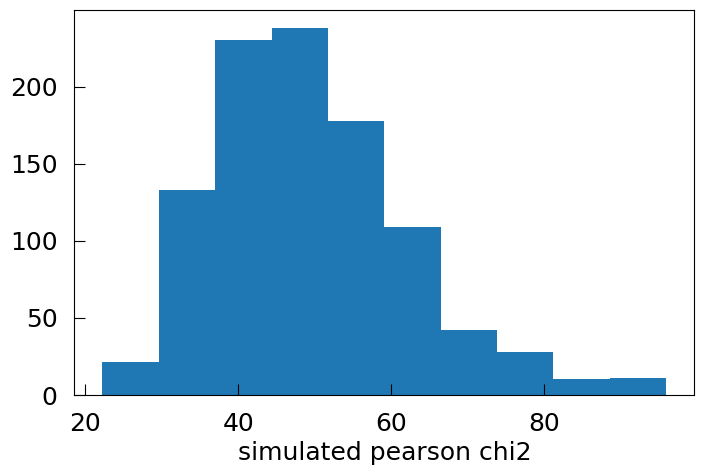

In [69]:
fig, ax = plt.subplots(ncols=1, figsize=(8,5))
ax.hist(PEARSONCHI2)
ax.set_xlabel("simulated pearson chi2")

pvals = 1 - stats.chi2.cdf(PEARSONCHI2, df=n-2)
print( "fraction of rejected tests at alpha=0.05 :" , sum(pvals < 0.05)/len(pvals) )
print("K-S test of observed distribution of deviance with a chi2 with n-2 df :" ,
      stats.kstest(PEARSONCHI2, lambda x: stats.chi2.cdf(x , df = n-2)).pvalue )

So, it would appear that for this parameter set (n0 , beta, sample size) the pearson Chi2 does not follow the expected Chi-square distribution...

This being said, we just simulated a large number of pearson Chi2 for our model. This could be used as a reference distribution instead of the chi-square distribution! (the whole goal of the Chi-square approximation is so that we don't have to do this sort of simulation approach to begin with...)

On our infection data, the observed pearson Chi2 is around 2720. 
This is way bigger than what we get with the simulated values : it is likely that our Poisson model is not so good.

In the next part, we will try another, more complex model on this data.

> Feel free to play around with this simulations parameters. For instance, when `beta=0.5` , `n0 = 10` and `n=500`, the Pearson Chi2 actually seems to follow something close to the expected chi-square distribution



[back to the toc](#toc)

<br>

# Annex : trying a negative binomial model on the infection data <a id='A3'></a>


The poisson model arguably models the data better than a simple linear model on the log-transformed data.
However, a poisson model present the strict hypothesis that there is a perfect relationship between the mean and the variance of the noise around the predicted values.

This is a strong hypothesis, and maybe one we could want to relax : indeed in practise the data may be overdispersed (the variance is higher than the mean) or underdispersed (the variance is lower than the mean). 


One of the definition of the negative binomial model is as a poisson model with an additionnal parameter ($\alpha$) that controls over/under-dispersion.

Here, the idea is that Rather than $variance = mean$, we have

$$Variance = mean + \alpha * mean^2$$

So to test our hypothesis, we will try to fit a negative binomial model on our data and compare the fit with the previous poisson model.




C-T dispersion test: alpha = 0.047, 95% CI = (0.003, 0.091)
                 Generalized Linear Model Regression Results                  
Dep. Variable:             Infections   No. Observations:                   54
Model:                            GLM   Df Residuals:                       52
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -286.39
Date:                Tue, 28 Nov 2023   Deviance:                       221.17
Time:                        13:37:35   Pearson chi2:                     248.
No. Iterations:                    11   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

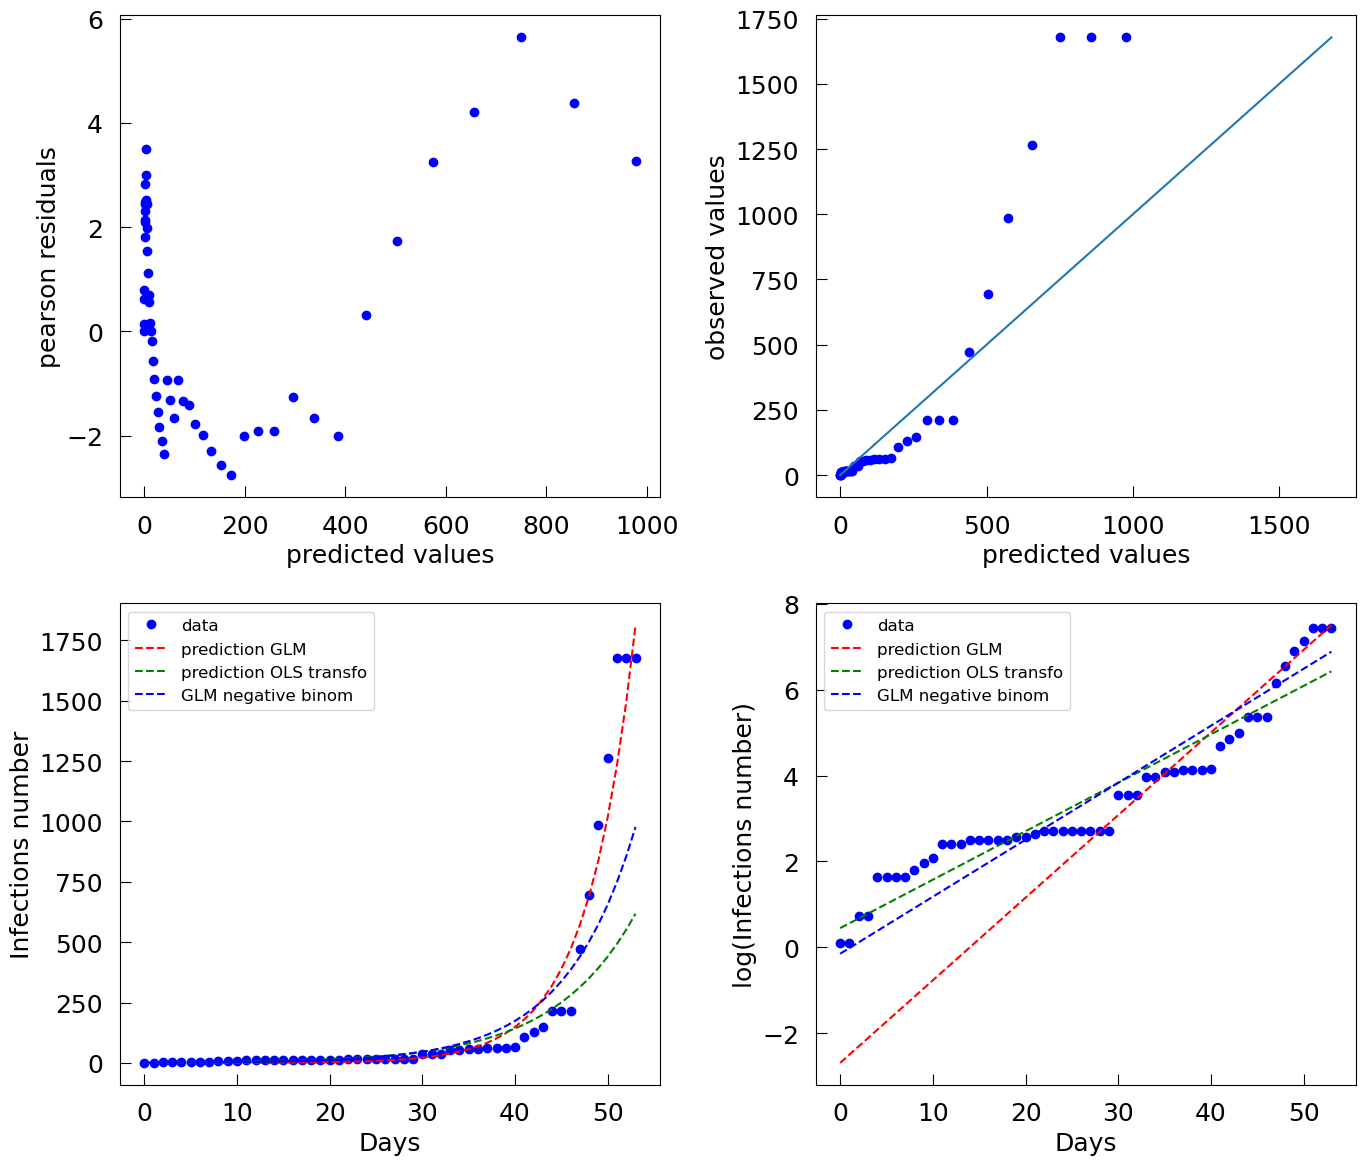

In [70]:
## trying a negative binomial to account for overdispersion

# from : https://dius.com.au/2017/08/03/using-statsmodels-glms-to-model-beverage-consumption/
# using Cameron-Trivedi dispersion test to estimate alpha
y=df_corona_exp["Infections"]
X=df_corona_exp["Days"]#again making it an array
X = sm.add_constant(X)#the model doesn't include an intercept automatically so we creat one
model = sm.GLM(y, X,
               family=sm.families.Poisson( link = sm.families.links.log() ))
results = model.fit()#we do the actual fit


MU = results.mu
Y = y
RESP = ( (Y-MU)**2 - MU ) / MU

ct_results = sm.OLS( RESP , MU ).fit()
#print(ct_results.summary())
# Construct confidence interval for alpha, the coefficient of the mean in the mean-variance relationship
alpha_ci95 = ct_results.conf_int(0.05).loc['x1']
print('\nC-T dispersion test: alpha = {:5.3f}, 95% CI = ({:5.3f}, {:5.3f})'.format(ct_results.params[0], alpha_ci95.loc[0], alpha_ci95.loc[1]))
alpha = ct_results.params[0]
##
model = sm.GLM(y, X,
               family=sm.families.NegativeBinomial( alpha = alpha , link = sm.families.links.log() ))
results = model.fit()#we do the actual fit


fig, ax = plt.subplots( ncols=2,nrows=2 ,figsize=(14,12))
ax[0][0].plot(results.mu , results.resid_pearson , 'bo')
ax[0][0].set_xlabel("predicted values")
ax[0][0].set_ylabel("pearson residuals")

ax[0][1].plot(results.mu , y , 'bo')
ax[0][1].plot( [0,max(y)], [0,max(y)] )
ax[0][1].set_xlabel("predicted values")
ax[0][1].set_ylabel("observed values")

ax[1][0].plot(list(df_corona_exp["Days"]),list(df_corona_exp["Infections"]),'bo',label='data')
ax[1][0].plot(list(df_corona_exp["Days"]),[np.exp(-2.6891)*np.exp(0.1923*t) for t in list(df_corona_exp["Days"])],'r--',label='prediction GLM')
ax[1][0].plot(list(df_corona_exp["Days"]),[np.exp(0.448)*np.exp(0.1128*t) for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')
ax[1][0].plot( df_corona_exp["Days"] , results.mu , 'b--',label='GLM negative binom')


ax[1][0].set_xlabel('Days')
ax[1][0].set_ylabel('Infections number')
ax[1][0].legend(loc='best',fontsize=12)

ax[1][1].plot(list(df_corona_exp["Days"]),list(df_corona_exp["log_infect"]),'bo',label='data')
ax[1][1].plot(list(df_corona_exp["Days"]),[-2.6891+0.1923*t for t in list(df_corona_exp["Days"])],'r--',label='prediction GLM')
ax[1][1].plot(list(df_corona_exp["Days"]),[0.448+0.1128*t for t in list(df_corona_exp["Days"])],'g--',label='prediction OLS transfo')
ax[1][1].plot( df_corona_exp["Days"] , np.log(results.mu) , 'b--',label='GLM negative binom')

ax[1][1].set_xlabel('Days')
ax[1][1].set_ylabel('log(Infections number)')
ax[1][1].legend(loc='best',fontsize=12)
plt.tight_layout()

plt.tight_layout()

res=results.summary()
print(res)

Here, we can see that metrics such as Deviance and Pearson Chi-square are better.

However, something may not really be correct in that model. In fact, it is very likely that it is undergoing some form of autocorrelation , ie. the number of infected at time $t+1$ does not depend so much on the day, but rather on the number of infected at time $t$ (and/or $t-1$, $t-2$, ...).

[back to the toc](#toc)

<br>

# Annex : compute the confidence interval in GLMs - example with a gaussian distribution <a id='confint'></a>

As a side note for now, but important for the rest:

$$\hat{\pmb\beta}=(\pmb X^T \pmb X)^{-1}\pmb X^T \pmb Y$$

is the solution from both the maximum likelihood in the case of normally distributed noise, and the least square fit.

As a quick proof, and also to get a feeling of how all of this is working we can take the simple case of $\bar{y_i}=\beta x_i=f(x_i,\beta)$.

In that case the loglikelihood look like 

$$l=\sum_i -\frac{1}{2}\frac{(y_i-\beta x_i)^2}{\sigma^2} + constant $$

The partial derivative of this likelihood with respect to the $\beta$ parameter is :

$$\frac{\partial l}{\partial \beta}\propto\sum_i -2x_iy_i + 2\beta x_i^2$$

You want $\frac{\partial l}{\partial \beta}(\hat{\beta})=0$ as you are maximizing the likelihood so you end up with:

$$\hat{\beta} \sum_i x_i^2=\sum_i x_iy_i$$

Which in multivariate case actually corresponds to $(\pmb X^T \pmb X)\hat{\pmb\beta}=\pmb X^T \pmb Y$

The term $(\pmb X^T \pmb X)$ plays a special role, here and in the confidence interval seen before $\beta_j \in [\hat{\beta_j} \pm z_{1-\frac{\alpha}{2}}\sqrt{\hat{\sigma}^2 [(\pmb X^T \pmb X)^{-1}]_{j,j}}]$: 

$(\pmb X^T \pmb X)$ is generally related to the covariance of $\pmb X$. But in that specific case (normality), it is also a matrix representing the curvature of the log likelihood function at $\hat{\pmb \beta}$. You calculate the curvature of a function by calculating the matrix of second derivative called hessian. In our case you just differentiate one more time what we found before :

$$\frac{\partial^2 l}{\partial \beta^2}\propto\sum x_i^2$$

And indeed you find this $\sum x_i^2$ term which in multivariate forms is $(\pmb X^T \pmb X)$.



Calculating a confidence interval in the general case (in the case of the GLM that we will see later for example), involves inverting the curvature of the loglikelihood function at the estimated $\hat{\pmb \beta}$ and put in a normal confidence interval as seen before. 
In statistic this curvature matrix (also called hessian in mathematic) is related to the Fisher Information, which we will use later.